# Support Vector Machines (SVM)

In [1]:
# Importing required Dependencies
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.animation as animation

In [13]:
def run_simulation(clf):
    colordict = {0:'#E51E2B', 1:'#9F8889'}
    mdict = {1: 's', 0: 'o'}
    
    # we create 40 separable points
    X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=2)
    
    # fit the model, don't regularize for illustration purposes
    clf.fit(X, y)
    for i in range(len(y)):
        plt.scatter(X[i][0], X[i][1], c=colordict[y[i]], s=150, marker=mdict[y[i]])
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    c = ax.contour(XX, YY, Z, colors='k', alpha=0.5)
    
    # plot support vectors
    c = ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=350,
                  linewidth=1, facecolors='none', edgecolors='k')
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

## Linear Kernel

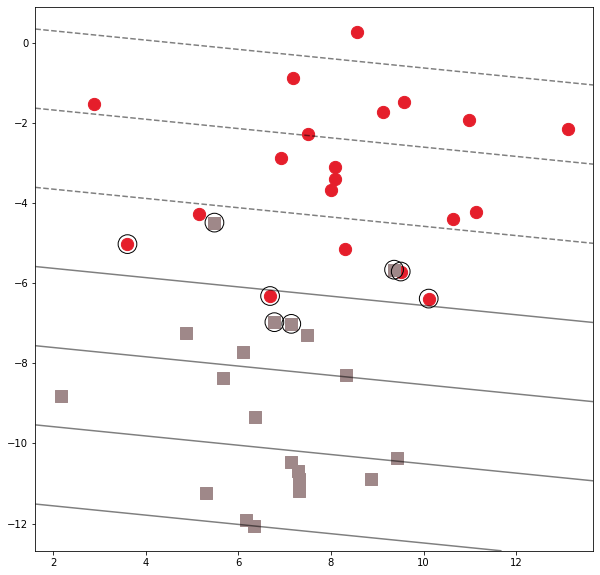

In [14]:
clf = svm.SVC(kernel='linear', C=100)
run_simulation(clf)

## Poly Kernel

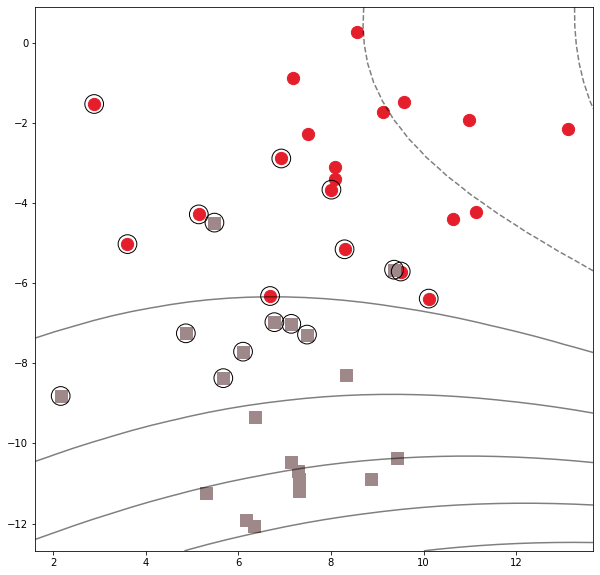

In [15]:
clf = svm.SVC(kernel='poly', degree=3)
run_simulation(clf)

## RBF kernel

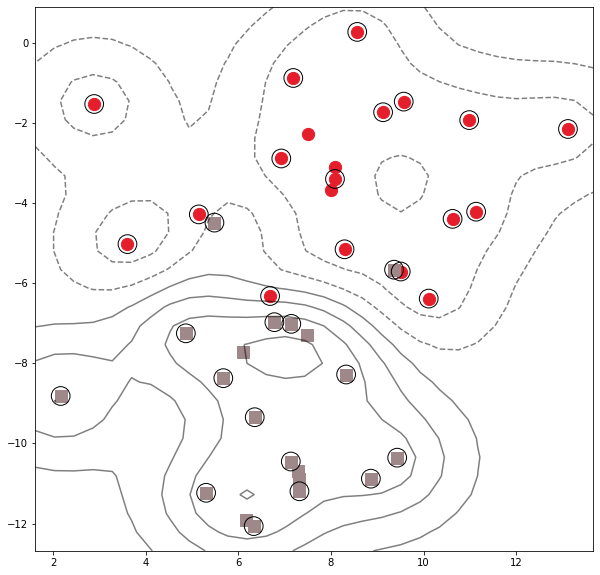

In [16]:
clf = svm.SVC(kernel='rbf', gamma=0.5)
run_simulation(clf)